# NLP Project
In this project, you are expected to perform NLP on an online dataset that you will obtain from an API or scraping.

This is an open-ended project, and you can be creative### !

Requirements:
Obtain data from an API or web-scraping. No premade datasets from Kaggle!
You are epxected to work on some form of text data.
Your goal is to uncover underlying clusters (social communities, market patters) etc., using unsupervised learning.
You can use any method; clustering, sentiment analysis, dimensionality reduction, pretrained models, word-embeddings, network embeddings, etc.
Create a visualization in 2d or 3d of the data with the clusters you found tagged. See reddit example below.
Analyze the produced clusters and use them to provide a short explanation of what you found.

# Data Science Jobs in Montréal

## Api and EDA

In [1]:
import csv
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the HTML from API file
file_path = 'C:/Users/taefa/Downloads/dataset_indeed-scraper_2024-11-15_04-14-04-311.html'
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

In [3]:
# Parse
soup = BeautifulSoup(html_content, 'html.parser')

In [4]:
# Print the parsed HTML to inspect the structure
print(soup.prettify())

<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta charset="utf-8"/>
  <title>
   Dataset items
  </title>
 </head>
 <body>
  <style>
   body {margin: 0;}table {border-collapse: collapse;border-spacing:0;border: solid 1px #D0D5E9;font-size: 12px;position: relative;}th {position: sticky;top: -1px;background-color: #E0E3F2;}th, td {padding: 5px 5px 5px 5px;border: solid 1px #D0D5E9;color: #242836;text-align: left;}td {vertical-align: top;}th pre, td pre {font-family: monospace !important;margin: 0;padding: 0 0 0 1px;white-space: pre-wrap;}thead tr td, thead tr th {color: #242836;font-size: 12px !important;}tbody > tr:nth-of-type(odd) {background-color: #F8F9FC;}tbody > tr:hover {background-color: #EEF0F8;}
  </style>
  <table>
   <thead>
    <tr>
     <th>
      <pre>company</pre>
     </th>
     <th>
      <pre>description</pre>
     </th>
     <th>
      <pre>descriptionHTML</pre>
     </th>
     <th>
      <pre>externalApplyLink</pre>
     </

In [5]:
text_content = soup.get_text()
print(text_content)

Dataset itemscompanydescriptiondescriptionHTMLexternalApplyLinkidisExpiredjobTypejobType/0jobType/1locationpositionNamepostedAtpostingDateParsedratingreviewsCountsalaryscrapedAtsearchInputurlurlInputZebra TechnologiesRemote Work: Hybrid
 
   Overview:
 
 
  At Zebra, we are a community of innovators who come together to create new ways of working to make everyday life better. United by curiosity and care, we develop dynamic solutions that anticipate our customer’s and partner’s needs and solve their challenges.
 
 
  
 
 
  Being a part of Zebra Nation means being seen, heard, valued, and respected. Drawing from our diverse perspectives, we collaborate to deliver on our purpose. Here you are a part of a team pushing boundaries to redefine the work of tomorrow for organizations, their employees, and those they serve.
 
 
  
 
 
  You have opportunities to learn and lead at a forward-thinking company, defining your path to a fulfilling career while channeling your skills toward causes th

In [6]:
table = soup.find('table')
headers = [header.get_text(strip=True) for header in table.find_all('th')]
rows = []
for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')
    row_data = [cell.get_text(strip=True) for cell in cells]
    rows.append(row_data)
df = pd.DataFrame(rows, columns=headers)
df

,company,description,descriptionHTML,externalApplyLink,id,isExpired,jobType,jobType/0,jobType/1,location,positionName,postedAt,postingDateParsed,rating,reviewsCount,salary,scrapedAt,searchInput,url,urlInput
0,Zebra Technologies,Remote Work: Hybrid\n \n Overview:\n \n \n ...,<div>\n <p><b>Remote Work: Hybrid</b></p>\n <d...,https://ca.indeed.com/applystart?jk=d27b9c7f49...,d27b9c7f49046039,false,,,,"Saint-Laurent, QC","Artificial Intelligence Scientist, II",Just posted,2024-11-15T04:11:50.144Z,3.7,611,,2024-11-15T04:11:50.147Z,,https://ca.indeed.com/viewjob?jk=d27b9c7f49046...,https://ca.indeed.com/jobs?q=data+scientist&l=...
1,ServiceNow,Description de l'entreprise\n Tout a commencé...,<div>\n <b>Description de l'entreprise</b>\n <...,https://ca.indeed.com/applystart?jk=69c99b72f6...,69c99b72f6393771,false,,Full-time,,"6650 Rue Saint-Urbain Ste 500, Montréal, QC",Senior Applied Research Scientist LLM Evaluation,Just posted,2024-11-15T04:11:50.631Z,3.8,273,,2024-11-15T04:11:50.633Z,,https://ca.indeed.com/viewjob?jk=69c99b72f6393...,https://ca.indeed.com/jobs?q=data+scientist&l=...
2,Capgemini,Choosing Capgemini means choosing a company wh...,<div>\n <p>Choosing Capgemini means choosing a...,https://ca.indeed.com/applystart?jk=ecdaf237ae...,ecdaf237ae32ab22,false,,Permanent,,"Montréal, QC",Machine Learning Engineer,1 day ago,2024-11-14T04:11:50.703Z,3.7,10339,,2024-11-15T04:11:50.920Z,,https://ca.indeed.com/viewjob?jk=ecdaf237ae32a...,https://ca.indeed.com/jobs?q=data+scientist&l=...
3,Intact,Our employees are at the heart of what we do b...,<div>\n <p>Our employees are at the heart of w...,https://ca.indeed.com/applystart?jk=16aa9bfe7f...,16aa9bfe7febaac5,false,,Full-time,,"Laval, QC",Visualization Analyst (Power BI Specialist),1 day ago,2024-11-14T04:11:50.997Z,3.7,454,,2024-11-15T04:11:51.184Z,,https://ca.indeed.com/viewjob?jk=16aa9bfe7feba...,https://ca.indeed.com/jobs?q=data+scientist&l=...
4,Desjardins,"As a data scientist, you provide the data need...","<div>\n <div>\n As a data scientist, you prov...",https://ca.indeed.com/applystart?jk=1deeb0892e...,1deeb0892ed3d4d6,false,,Full-time,,"500 Place d'Armes, Montréal, QC","Data Scientist, Data valorization",2 days ago,2024-11-13T04:11:51.238Z,3.8,1468,,2024-11-15T04:11:51.241Z,,https://ca.indeed.com/viewjob?jk=1deeb0892ed3d...,https://ca.indeed.com/jobs?q=data+scientist&l=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Airlab Inc.,"Job Description\n Airlab, a company created b...",<div>\n <b>Job Description</b>\n <p><br> Airla...,https://ca.indeed.com/applystart?jk=188d0e2bb3...,188d0e2bb3b7b634,false,,Permanent,,"Montréal, QC H2V 4S6",Artificial Intelligence Researcher,30+ days ago,2024-10-16T04:12:30.289Z,,,,2024-11-15T04:12:30.290Z,,https://ca.indeed.com/viewjob?jk=188d0e2bb3b7b...,https://ca.indeed.com/jobs?q=data+scientist&l=...
83,Cerence,A Moving Experience.\n \n \n Scientifique de ...,<div>\n <div>\n A Moving Experience.\n </div>...,https://ca.indeed.com/applystart?jk=8bee80fc8d...,8bee80fc8d87ec87,false,,Full-time,,"Montréal, QC",Senior Data Scientist,30+ days ago,2024-10-16T04:12:30.476Z,3.6,11,,2024-11-15T04:12:30.478Z,,https://ca.indeed.com/viewjob?jk=8bee80fc8d87e...,https://ca.indeed.com/jobs?q=data+scientist&l=...
84,ServiceNow,Company Description\n Tout a commencé sous le...,<div>\n <b>Company Description</b>\n <p><br> T...,https://ca.indeed.com/applystart?jk=1ebdd23a6c...,1ebdd23a6c7eef28,false,,Internship / Co-op,,"6650 Rue Saint-Urbain Ste 500, Montréal, QC",Associate Machine Learning Engineer Intern,6 days ago,2024-11-09T04:12:30.421Z,3.8,273,,2024-11-15T04:12:30.423Z,,https://ca.indeed.com/viewjob?jk=1ebdd23a6c7ee...,https://ca.indeed.com/jobs?q=data+scientist&l=...
85,Evercore,Founded over the fall of 2016 by Tech Entrepre...,<div></div>\n<div>\n <div>\n <div>\n <div>\...,https://ca.indeed.com/applystart?jk=083f774681...,083f77468150bef2,false,,Full-time,,"Montréal, QC",Data Analyst,30+ days ago,2024-10-16T04:1

### EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company            87 non-null     object
 1   description        87 non-null     object
 2   descriptionHTML    87 non-null     object
 3   externalApplyLink  87 non-null     object
 4   id                 87 non-null     object
 5   isExpired          87 non-null     object
 6   jobType            87 non-null     object
 7   jobType/0          87 non-null     object
 8   jobType/1          87 non-null     object
 9   location           87 non-null     object
 10  positionName       87 non-null     object
 11  postedAt           87 non-null     object
 12  postingDateParsed  87 non-null     object
 13  rating             87 non-null     object
 14  reviewsCount       87 non-null     object
 15  salary             87 non-null     object
 16  scrapedAt          87 non-null     object
 17 

In [8]:
df.isnull().sum()

company              0
description          0
descriptionHTML      0
externalApplyLink    0
id                   0
isExpired            0
jobType              0
jobType/0            0
jobType/1            0
location             0
positionName         0
postedAt             0
postingDateParsed    0
rating               0
reviewsCount         0
salary               0
scrapedAt            0
searchInput          0
url                  0
urlInput             0
dtype: int64

In [9]:
df['searchInput'].unique()

array([''], dtype=object)

In [10]:
df['salary'].unique()

array(['', 'Up to $6,240 a month', '$148,000–$222,000 a year',
       '$60–$75 an hour', '$45,000–$50,000 a year',
       '$75,000–$85,000 a year', '$130,000–$230,000 a year',
       '$85,000–$90,000 a year', 'Up to $104,000 a year',
       '$125,000–$220,000 a year', '$20 an hour'], dtype=object)

In [11]:
df['reviewsCount'].unique()

array(['611', '273', '10339', '454', '1468', '', '18', '756', '35', '4',
       '986', '13', '12071', '80', '465', '1213', '5', '4947', '22',
       '3445', '23', '304', '634', '420', '1588', '105', '2762', '6710',
       '11', '45', '25', '3397', '47', '570', '3', '14', '632'],
      dtype=object)

In [12]:
df['rating'].unique()

array(['3.7', '3.8', '', '3.4', '4.1', '4.4', '5', '3.9', '4', '4.2',
       '3.5', '2.8', '3.2', '2.9', '4.3', '3.6'], dtype=object)

In [13]:
df['postedAt'].unique()

array(['Just posted', '1 day ago', '2 days ago', '3 days ago',
       '6 days ago', '9 days ago', '10 days ago', '13 days ago',
       '7 days ago', '16 days ago', '17 days ago', '24 days ago',
       '27 days ago', '22 days ago', '23 days ago', '21 days ago',
       '14 days ago', '29 days ago', '20 days ago', '28 days ago',
       '15 days ago', '30+ days ago', '30 days ago'], dtype=object)

In [14]:
df['isExpired'].unique()

array(['false'], dtype=object)

In [15]:
df['postingDateParsed'].unique()

array(['2024-11-15T04:11:50.144Z', '2024-11-15T04:11:50.631Z',
       '2024-11-14T04:11:50.703Z', '2024-11-14T04:11:50.997Z',
       '2024-11-13T04:11:51.238Z', '2024-11-12T04:11:53.478Z',
       '2024-11-09T04:11:53.391Z', '2024-11-13T04:11:54.741Z',
       '2024-11-15T04:11:54.912Z', '2024-11-12T04:11:54.964Z',
       '2024-11-06T04:11:56.162Z', '2024-11-05T04:11:56.593Z',
       '2024-11-02T04:11:57.100Z', '2024-11-08T04:11:57.472Z',
       '2024-11-09T04:11:57.557Z', '2024-11-08T04:11:58.408Z',
       '2024-11-06T04:11:59.446Z', '2024-10-30T04:11:59.543Z',
       '2024-11-14T04:12:00.618Z', '2024-11-12T04:12:00.991Z',
       '2024-11-06T04:12:02.200Z', '2024-11-09T04:12:02.261Z',
       '2024-10-30T04:12:02.551Z', '2024-10-29T04:12:03.581Z',
       '2024-10-22T04:12:03.886Z', '2024-10-19T04:12:03.982Z',
       '2024-10-24T04:12:04.079Z', '2024-10-23T04:12:04.187Z',
       '2024-10-25T04:12:04.500Z', '2024-10-25T04:12:04.571Z',
       '2024-11-02T04:12:06.917Z', '2024-11-01T04:12:07

In [16]:
df['jobType'].unique()

array([''], dtype=object)

In [17]:
df['jobType/0'].unique()

array(['', 'Full-time', 'Permanent', 'Internship / Co-op', 'Contract',
       'Part-time', 'Fixed term contract'], dtype=object)

In [18]:
df['jobType/1'].unique()

array(['', 'Internship / Co-op', 'Full-time'], dtype=object)

In [19]:
df['location'].unique()

array(['Saint-Laurent, QC', '6650 Rue Saint-Urbain Ste 500, Montréal, QC',
       'Montréal, QC', 'Laval, QC', "500 Place d'Armes, Montréal, QC",
       'Pointe-Claire, QC H9R 5R4', 'Montréal, QC H3B 4C9',
       'Montréal, QC H3A 2L1', 'Montréal, QC H3C 3X6',
       '600 Rue Chabanel Ouest, Montréal, QC H2N 2K6',
       '5 Place Ville Marie, Montréal, QC H3B 5E7',
       '5592 Rue Ferrier, Mont-royal, QC H4P 1M2', 'Montréal, QC H4M 2Z2',
       '99 High Street,Boston,MA 02110,United States of America,99 High Street,Boston,MA 02110,United States of America, Montréal, QC H1V 1A6',
       '1360 Boulevard René-Lévesque Ouest, Montréal, QC H3G 2W4',
       '2015 Avenue Haig, Montréal, QC H1N 3E2',
       '1100 Boul Robert-Bourassa Ste 200, Montréal, QC', 'Dorval, QC',
       'Montréal, QC H3Z 3C1', 'Montréal, QC H1V 3S8',
       'Dollard-Des Ormeaux, QC',
       '9025 Boulevard Maurice-Duplessis, Montréal, QC H1E 6M3',
       'Vaudreuil-Dorion, QC J7V 6T9',
       'Montreal,Quebec H4N 3L4,

In [20]:
df['positionName'].unique()

array(['Artificial Intelligence Scientist, II',
       'Senior Applied Research Scientist LLM Evaluation',
       'Machine Learning Engineer',
       'Visualization Analyst (Power BI Specialist)',
       'Data Scientist, Data valorization',
       'Artificial Intelligence (AI) / Machine Learning (ML) Developers',
       'Intern, Data Science', 'Advanced Analytics Specialist',
       'Research Scientist Intern, Embodied AI (PhD) | Stagiaire chercheur, IA incarnée (doctorat)',
       'AI Machine Learning Engineer (Hybrid – Montreal)',
       'Lead ML Engineer (Team Lead)',
       'Senior Data Scientist, Data valorization',
       'Senior Data Scientist', 'Software Developer II',
       'Ingénieur de données - Data Engineer',
       'IT Business Intelligence Intern',
       'Spécialiste en Power BI (Développeur) / Power BI Specialist (Developer)',
       'CHIEF DATA & AI OFFICER',
       'Sr. Director, Data, Analytics & Artificial Intelligence',
       'Machine Learning Modeling Engineer'

In [21]:
df['positionName'].nunique()

79

In [22]:
df['company'].unique()

array(['Zebra Technologies', 'ServiceNow', 'Capgemini', 'Intact',
       'Desjardins', 'SynAxiom', 'CN', 'Meta', 'WonderBotz', 'Datatonic',
       'National Bank of Canada', 'BrainBox AI Inc.', 'Datavalet',
       'Nestle Operational Services Worldwide SA', 'App Group',
       'Business Development Bank of Canada', 'Groupe Dynamite Inc.',
       'Corning', 'Oliver Wyman Group', 'DRW', 'G2i Inc',
       'NAPA Auto Parts', 'Sofistic.ai', 'Hinge-Health', 'Bombardier',
       'ARO Inc', 'Intellibus Ventures LLC', 'Intellibus',
       'Dialogue Health Technologies Inc.', 'Cosmetic Physician Partners',
       'CF Montréal', 'Confidential', 'Brother Canada', 'NRG PERSONNEL',
       'UKG', 'Ubisoft', 'S&P Global', 'PPT', 'Sonder', 'Connect&GO',
       'Coactive AI', 'Thales', 'Decathlon Canada', 'nomic', 'Bounteous',
       'Facebook App', 'Unity Technologies', 'TouchTunes',
       'Crédit Agricole CIB', 'Triton Digital Canada Inc.',
       'Polytechnique Montreal', 'Autodesk', 'Reliant AI',
 

In [23]:
df['company'].nunique()

66

In [24]:
df['jobtype'] = df['jobType/0'].astype(str) + df['jobType/1']
df['jobtype']

0                       
1              Full-time
2              Permanent
3              Full-time
4              Full-time
             ...        
82             Permanent
83             Full-time
84    Internship / Co-op
85             Full-time
86                      
Name: jobtype, Length: 87, dtype: object

In [25]:
df

,company,description,descriptionHTML,externalApplyLink,id,isExpired,jobType,jobType/0,jobType/1,location,...,postedAt,postingDateParsed,rating,reviewsCount,salary,scrapedAt,searchInput,url,urlInput,jobtype
0,Zebra Technologies,Remote Work: Hybrid\n \n Overview:\n \n \n ...,<div>\n <p><b>Remote Work: Hybrid</b></p>\n <d...,https://ca.indeed.com/applystart?jk=d27b9c7f49...,d27b9c7f49046039,false,,,,"Saint-Laurent, QC",...,Just posted,2024-11-15T04:11:50.144Z,3.7,611,,2024-11-15T04:11:50.147Z,,https://ca.indeed.com/viewjob?jk=d27b9c7f49046...,https://ca.indeed.com/jobs?q=data+scientist&l=...,
1,ServiceNow,Description de l'entreprise\n Tout a commencé...,<div>\n <b>Description de l'entreprise</b>\n <...,https://ca.indeed.com/applystart?jk=69c99b72f6...,69c99b72f6393771,false,,Full-time,,"6650 Rue Saint-Urbain Ste 500, Montréal, QC",...,Just posted,2024-11-15T04:11:50.631Z,3.8,273,,2024-11-15T04:11:50.633Z,,https://ca.indeed.com/viewjob?jk=69c99b72f6393...,https://ca.indeed.com/jobs?q=data+scientist&l=...,Full-time
2,Capgemini,Choosing Capgemini means choosing a company wh...,<div>\n <p>Choosing Capgemini means choosing a...,https://ca.indeed.com/applystart?jk=ecdaf237ae...,ecdaf237ae32ab22,false,,Permanent,,"Montréal, QC",...,1 day ago,2024-11-14T04:11:50.703Z,3.7,10339,,2024-11-15T04:11:50.920Z,,https://ca.indeed.com/viewjob?jk=ecdaf237ae32a...,https://ca.indeed.com/jobs?q=data+scientist&l=...,Permanent
3,Intact,Our employees are at the heart of what we do b...,<div>\n <p>Our employees are at the heart of w...,https://ca.indeed.com/applystart?jk=16aa9bfe7f...,16aa9bfe7febaac5,false,,Full-time,,"Laval, QC",...,1 day ago,2024-11-14T04:11:50.997Z,3.7,454,,2024-11-15T04:11:51.184Z,,https://ca.indeed.com/viewjob?jk=16aa9bfe7feba...,https://ca.indeed.com/jobs?q=data+scientist&l=...,Full-time
4,Desjardins,"As a data scientist, you provide the data need...","<div>\n <div>\n As a data scientist, you prov...",https://ca.indeed.com/applystart?jk=1deeb0892e...,1deeb0892ed3d4d6,false,,Full-time,,"500 Place d'Armes, Montréal, QC",...,2 days ago,2024-11-13T04:11:51.238Z,3.8,1468,,2024-11-15T04:11:51.241Z,,https://ca.indeed.com/viewjob?jk=1deeb0892ed3d...,https://ca.indeed.com/jobs?q=data+scientist&l=...,Full-time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Airlab Inc.,"Job Description\n Airlab, a company created b...",<div>\n <b>Job Description</b>\n <p><br> Airla...,https://ca.indeed.com/applystart?jk=188d0e2bb3...,188d0e2bb3b7b634,false,,Permanent,,"Montréal, QC H2V 4S6",...,30+ days ago,2024-10-16T04:12:30.289Z,,,,2024-11-15T04:12:30.290Z,,https://ca.indeed.com/viewjob?jk=188d0e2bb3b7b...,https://ca.indeed.com/jobs?q=data+scientist&l=...,Permanent
83,Cerence,A Moving Experience.\n \n \n Scientifique de ...,<div>\n <div>\n A Moving Experience.\n </div>...,https://ca.indeed.com/applystart?jk=8bee80fc8d...,8bee80fc8d87ec87,false,,Full-time,,"Montréal, QC",...,30+ days ago,2024-10-16T04:12:30.476Z,3.6,11,,2024-11-15T04:12:30.478Z,,https://ca.indeed.com/viewjob?jk=8bee80fc8d87e...,https://ca.indeed.com/jobs?q=data+scientist&l=...,Full-time
84,ServiceNow,Company Description\n Tout a commencé sous le...,<div>\n <b>Company Description</b>\n <p><br> T...,https://ca.indeed.com/applystart?jk=1ebdd23a6c...,1ebdd23a6c7eef28,false,,Internship / Co-op,,"6650 Rue Saint-Urbain Ste 500, Montréal, QC",...,6 days ago,2024-11-09T04:12:30.421Z,3.8,273,,2024-11-15T04:12:30.423Z,,https://ca.indeed.com/viewjob?jk=1ebdd23a6c7ee...,https://ca.indeed.com/jobs?q=data+scientist&l=...,Internship / Co-op
85,Evercore,Founded over the fall of 2016 by Tech Entrepre...,<div></div>\n<div>\n <div>\n <div>\n <div>\...,https://ca.indeed.com/applystart?jk=083f774681...,083f77468150bef2,false,,Full-time,,"Montréal, QC",...,30+ days ago,2024-10-16T04:12:31.123Z,4.1,23,,2024-11-15T04:12:31.125Z,,https://ca.indeed.com/viewjob?jk=083f77468150b...,https://ca.indeed.com/jobs?q=data+scientist&l=...,Full-time


In [26]:
df = df.drop(columns=['searchInput','isExpired','jobType','jobType/0','jobType/1','externalApplyLink','scrapedAt','url','urlInput'])

In [27]:
df = df.drop(columns=['id','descriptionHTML','postingDateParsed','reviewsCount'])

In [28]:
df

,company,description,location,positionName,postedAt,rating,salary,jobtype
0,Zebra Technologies,Remote Work: Hybrid\n \n Overview:\n \n \n ...,"Saint-Laurent, QC","Artificial Intelligence Scientist, II",Just posted,3.7,,
1,ServiceNow,Description de l'entreprise\n Tout a commencé...,"6650 Rue Saint-Urbain Ste 500, Montréal, QC",Senior Applied Research Scientist LLM Evaluation,Just posted,3.8,,Full-time
2,Capgemini,Choosing Capgemini means choosing a company wh...,"Montréal, QC",Machine Learning Engineer,1 day ago,3.7,,Permanent
3,Intact,Our employees are at the heart of what we do b...,"Laval, QC",Visualization Analyst (Power BI Specialist),1 day ago,3.7,,Full-time
4,Desjardins,"As a data scientist, you provide the data need...","500 Place d'Armes, Montréal, QC","Data Scientist, Data valorization",2 days ago,3.8,,Full-time
...,...,...,...,...,...,...,...,...
82,Airlab Inc.,"Job Description\n Airlab, a company created b...","Montréal, QC H2V 4S6",Artificial Intelligence Researcher,30+ days ago,,,Permanent
83,Cerence,A Moving Experience.\n \n \n Scientifique de ...,"Montréal, QC",Senior Data Scientist,30+ days ago,3.6,,Full-time
84,ServiceNow,Company Description\n Tout a commencé sous le...,"6650 Rue Saint-Urbain Ste 500, Montréal, QC",Associate Machine Learning Engineer Intern,6 days ago,3.8,,Internship / Co-op
85,Evercore,Founded over the fall of 2016 by Tech Entrepre...,"Montréal, QC",Data Analyst,30+ days ago,4.1,,Full-time


In [29]:
df['jobtype'].unique()

array(['', 'Full-time', 'Permanent', 'Full-timeInternship / Co-op',
       'Internship / Co-op', 'Contract', 'PermanentFull-time',
       'Part-time', 'Fixed term contract'], dtype=object)

In [30]:
# Replace all empty strings
df.replace('', 'other', inplace=True)
df

,company,description,location,positionName,postedAt,rating,salary,jobtype
0,Zebra Technologies,Remote Work: Hybrid\n \n Overview:\n \n \n ...,"Saint-Laurent, QC","Artificial Intelligence Scientist, II",Just posted,3.7,other,other
1,ServiceNow,Description de l'entreprise\n Tout a commencé...,"6650 Rue Saint-Urbain Ste 500, Montréal, QC",Senior Applied Research Scientist LLM Evaluation,Just posted,3.8,other,Full-time
2,Capgemini,Choosing Capgemini means choosing a company wh...,"Montréal, QC",Machine Learning Engineer,1 day ago,3.7,other,Permanent
3,Intact,Our employees are at the heart of what we do b...,"Laval, QC",Visualization Analyst (Power BI Specialist),1 day ago,3.7,other,Full-time
4,Desjardins,"As a data scientist, you provide the data need...","500 Place d'Armes, Montréal, QC","Data Scientist, Data valorization",2 days ago,3.8,other,Full-time
...,...,...,...,...,...,...,...,...
82,Airlab Inc.,"Job Description\n Airlab, a company created b...","Montréal, QC H2V 4S6",Artificial Intelligence Researcher,30+ days ago,other,other,Permanent
83,Cerence,A Moving Experience.\n \n \n Scientifique de ...,"Montréal, QC",Senior Data Scientist,30+ days ago,3.6,other,Full-time
84,ServiceNow,Company Description\n Tout a commencé sous le...,"6650 Rue Saint-Urbain Ste 500, Montréal, QC",Associate Machine Learning Engineer Intern,6 days ago,3.8,other,Internship / Co-op
85,Evercore,Founded over the fall of 2016 by Tech Entrepre...,"Montréal, QC",Data Analyst,30+ days ago,4.1,other,Full-time


In [31]:
# Job titles to categories
category_mapping = {
    'Data Scientist/Analyst': [
        'Data Scientist', 'Data Analyst', 'Senior Data Analyst', 'Data Science Analyst',
        'Senior Data Scientist', 'Data Scientist Lead'
    ],
    'Machine Learning/AI Engineer': [
        'Machine Learning Engineer', 'AI Machine Learning Engineer', 'Senior AI/ML Developer',
        'Machine Learning Specialist', 'Machine Learning Developer', 'ML Engineer', 'Staff Machine Learning Developer'
    ],
    'Data Engineering': [
        'Data Engineer', 'Data Engineering Developer Intermediate', 'Ingénieur de données - Data Engineer',
        'Senior Data Engineer', 'Data Developer'
    ],
    'Research Scientist': [
        'Research Scientist', 'Research Scientist Intern', 'Scientifique en recherche appliquée',
        'Senior R&D Data Scientist', 'Postdoctoral Researcher', 'Staff Applied Research Scientist'
    ],
    'Business Intelligence': [
        'Business Intelligence (BI) Developer', 'Advanced Analytics Specialist',
        'Business Intelligence Intern', 'Visualization Analyst', 'Manager, Data Analytics',
        'IT Business Intelligence Intern', 'BI Specialist'
    ],
    'Leadership/Management': [
        'Chief Data & AI Officer', 'Sr. Director, Data, Analytics & Artificial Intelligence',
        'Manager, Artificial Intelligence', 'Manager, Market Analytics & Growth Strategy', 'Sr. Manager, Business Intelligence Transformation'
    ],
    'Other': [
        'Intern, Data Science', 'Research Scientist Intern, Embodied AI (PhD)','Artificial Intelligence Scientist, II', 'Senior Applied Research Scientist LLM Evaluation'
    ],
}

def get_category(position_name):
    for category, titles in category_mapping.items():
        if any(title in position_name for title in titles):
            return category
    return 'Other'

df['position'] = df['positionName'].apply(get_category)
df

,company,description,location,positionName,postedAt,rating,salary,jobtype,position
0,Zebra Technologies,Remote Work: Hybrid\n \n Overview:\n \n \n ...,"Saint-Laurent, QC","Artificial Intelligence Scientist, II",Just posted,3.7,other,other,Other
1,ServiceNow,Description de l'entreprise\n Tout a commencé...,"6650 Rue Saint-Urbain Ste 500, Montréal, QC",Senior Applied Research Scientist LLM Evaluation,Just posted,3.8,other,Full-time,Research Scientist
2,Capgemini,Choosing Capgemini means choosing a company wh...,"Montréal, QC",Machine Learning Engineer,1 day ago,3.7,other,Permanent,Machine Learning/AI Engineer
3,Intact,Our employees are at the heart of what we do b...,"Laval, QC",Visualization Analyst (Power BI Specialist),1 day ago,3.7,other,Full-time,Business Intelligence
4,Desjardins,"As a data scientist, you provide the data need...","500 Place d'Armes, Montréal, QC","Data Scientist, Data valorization",2 days ago,3.8,other,Full-time,Data Scientist/Analyst
...,...,...,...,...,...,...,...,...,...
82,Airlab Inc.,"Job Description\n Airlab, a company created b...","Montréal, QC H2V 4S6",Artificial Intelligence Researcher,30+ days ago,other,other,Permanent,Other
83,Cerence,A Moving Experience.\n \n \n Scientifique de ...,"Montréal, QC",Senior Data Scientist,30+ days ago,3.6,other,Full-time,Data Scientist/Analyst
84,ServiceNow,Company Description\n Tout a commencé sous le...,"6650 Rue Saint-Urbain Ste 500, Montréal, QC",Associate Machine Learning Engineer Intern,6 days ago,3.8,other,Internship / Co-op,Machine Learning/AI Engineer
85,Evercore,Founded over the fall of 2016 by Tech Entrepre...,"Montréal, QC",Data Analyst,30+ days ago,4.1,other,Full-time,Data Scientist/Analyst


In [32]:
df = df.drop(columns=['positionName'])

In [33]:
df.rename(columns={'location': 'address'}, inplace=True)

In [34]:
df

,company,description,address,postedAt,rating,salary,jobtype,position
0,Zebra Technologies,Remote Work: Hybrid\n \n Overview:\n \n \n ...,"Saint-Laurent, QC",Just posted,3.7,other,other,Other
1,ServiceNow,Description de l'entreprise\n Tout a commencé...,"6650 Rue Saint-Urbain Ste 500, Montréal, QC",Just posted,3.8,other,Full-time,Research Scientist
2,Capgemini,Choosing Capgemini means choosing a company wh...,"Montréal, QC",1 day ago,3.7,other,Permanent,Machine Learning/AI Engineer
3,Intact,Our employees are at the heart of what we do b...,"Laval, QC",1 day ago,3.7,other,Full-time,Business Intelligence
4,Desjardins,"As a data scientist, you provide the data need...","500 Place d'Armes, Montréal, QC",2 days ago,3.8,other,Full-time,Data Scientist/Analyst
...,...,...,...,...,...,...,...,...
82,Airlab Inc.,"Job Description\n Airlab, a company created b...","Montréal, QC H2V 4S6",30+ days ago,other,other,Permanent,Other
83,Cerence,A Moving Experience.\n \n \n Scientifique de ...,"Montréal, QC",30+ days ago,3.6,other,Full-time,Data Scientist/Analyst
84,ServiceNow,Company Description\n Tout a commencé sous le...,"6650 Rue Saint-Urbain Ste 500, Montréal, QC",6 days ago,3.8,other,Internship / Co-op,Machine Learning/AI Engineer
85,Evercore,Founded over the fall of 2016 by Tech Entrepre...,"Montréal, QC",30+ days ago,4.1,other,Full-time,Data Scientist/Analyst


## Initial visualisations (curiosity)

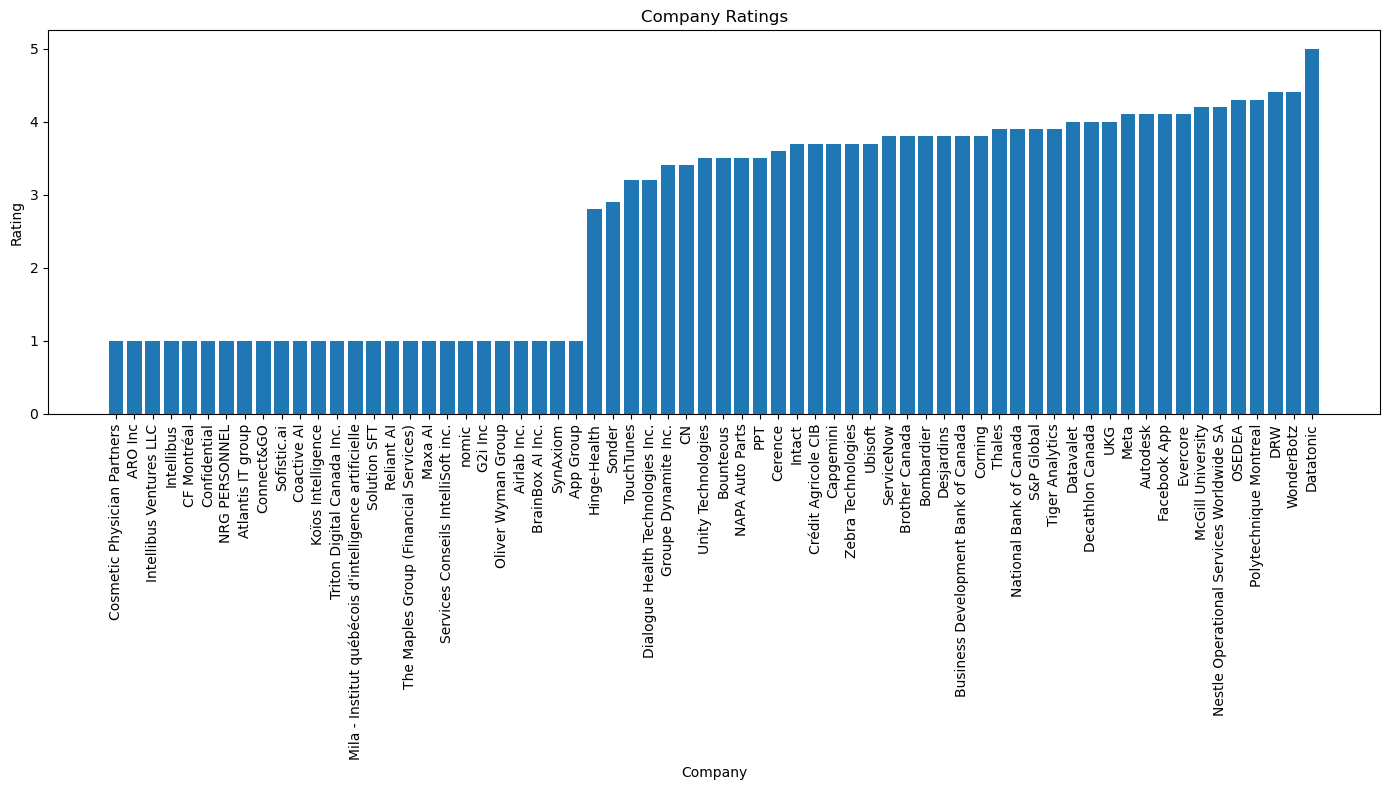

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
# changed to min rating which is 1
df['rating'].replace('other', 1, inplace=True)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'].fillna(1, inplace=True)
df_sorted = df.sort_values(by='rating')
plt.figure(figsize=(14, 8))
plt.bar(df_sorted['company'], df_sorted['rating'])
plt.xlabel('Company')
plt.ylabel('Rating')
plt.title('Company Ratings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

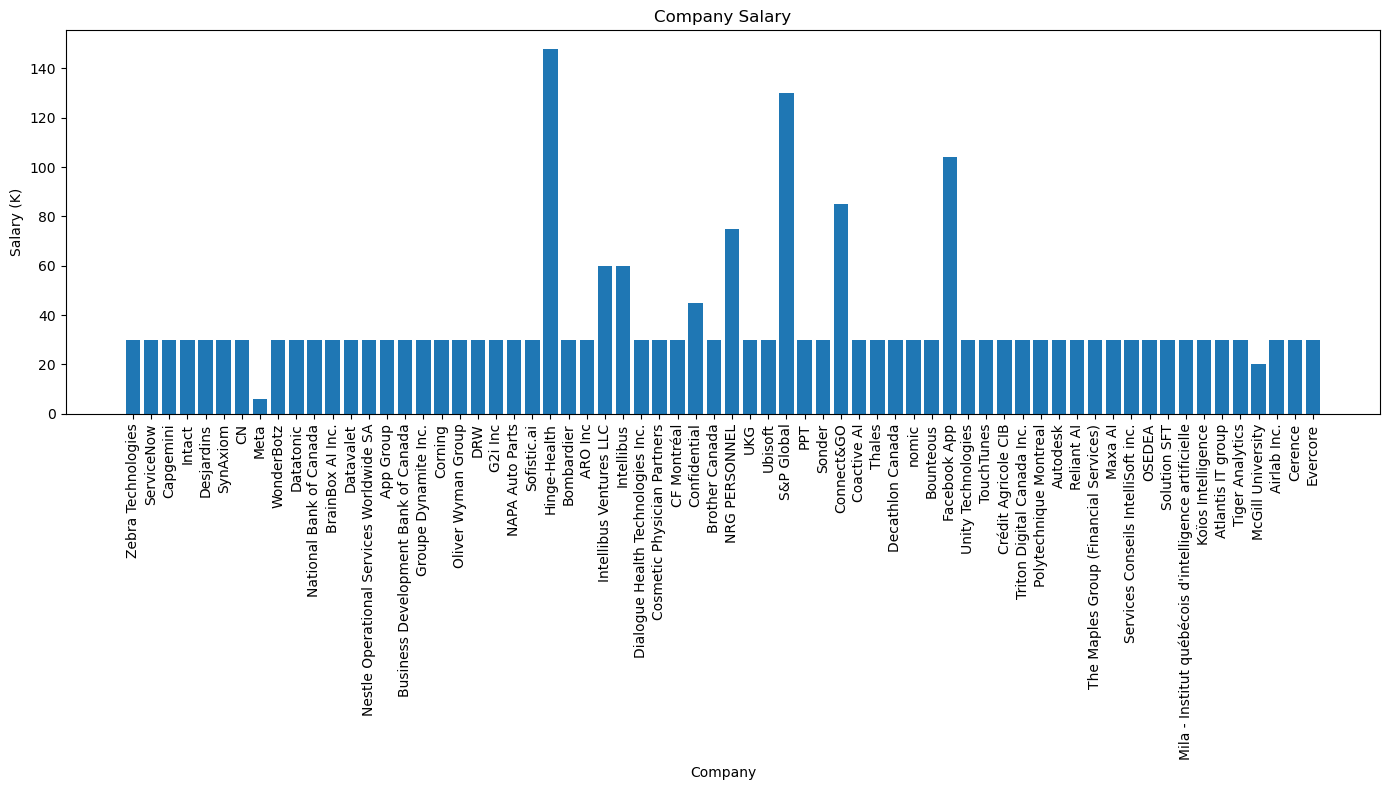

In [36]:
import re
import pandas as pd
import matplotlib.pyplot as plt

def extract_salary(salary):
    if isinstance(salary, str):
        if salary.lower() == 'other':
            return 30
        numbers = re.findall(r'\d+', salary)
        if numbers:
            return float(numbers[0])
        return 0
    elif isinstance(salary, (int, float)):
        return salary
    return 0
df['salary'] = df['salary'].apply(str)
df['salary'] = df['salary'].apply(extract_salary)

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(df['company'], df['salary'])
plt.xlabel('Company')
plt.ylabel('Salary (K)')
plt.title('Company Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


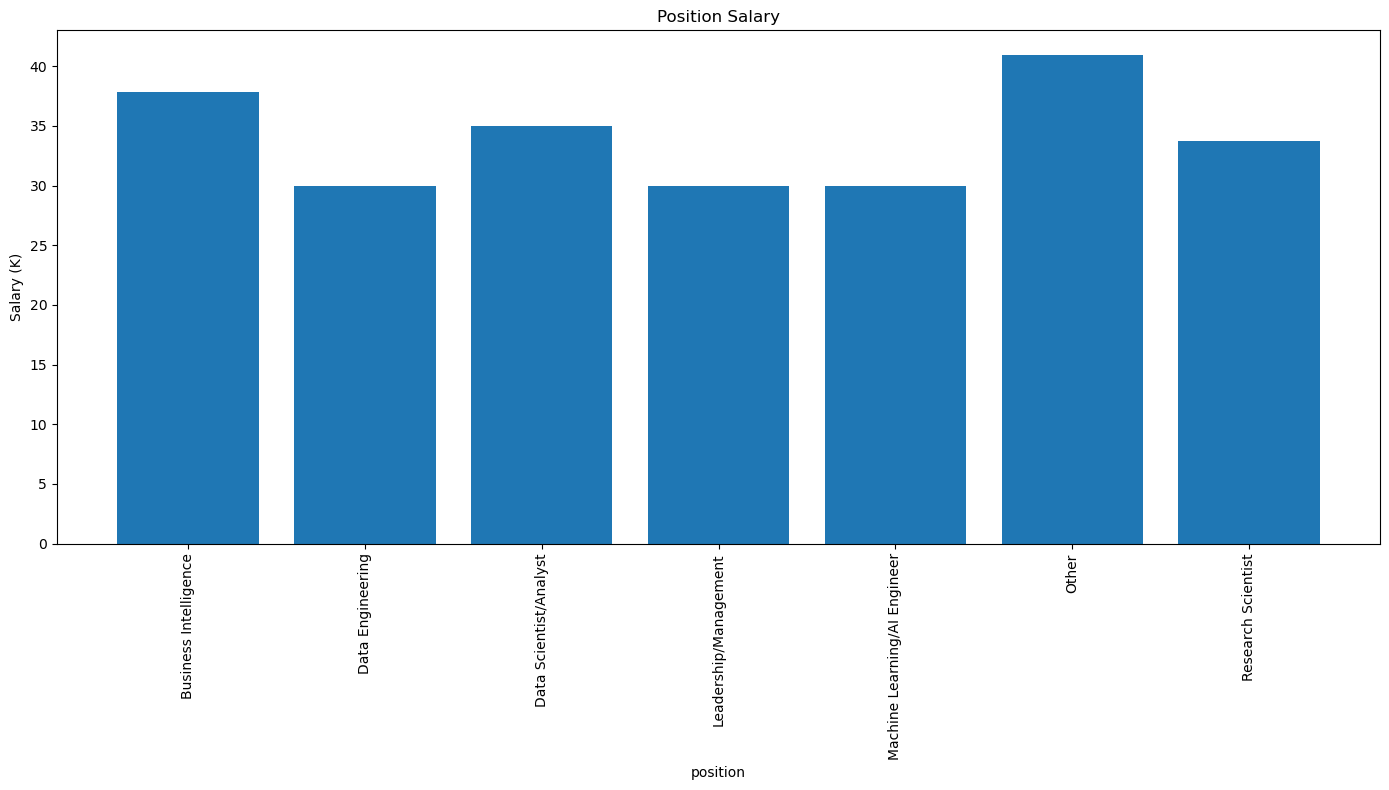

In [38]:
plt.figure(figsize=(14, 8))
mean_salary = df.groupby('position')['salary'].mean().reset_index()
plt.bar(mean_salary['position'], mean_salary['salary'])
plt.xlabel('position')
plt.ylabel('Salary (K)')
plt.title('Position Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Model to extract Diversity search

In [39]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
print(df.columns)
descriptions = df['description'].tolist()
df['salary'] = df['salary'].replace('other', 30712).astype(float)


Index(['company', 'description', 'address', 'postedAt', 'rating', 'salary',
       'jobtype', 'position'],
      dtype='object')


In [40]:
# Load the model
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

# embeddings
embeddings = model.encode(descriptions, convert_to_tensor=True)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Scale embeddings
scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(embeddings.cpu().numpy())

In [42]:
# K-means clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_embeddings)
df['cluster'] = clusters
print(df[['description', 'cluster']])

C:\Users\taefa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\taefa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


                                          description  cluster
0   Remote Work: Hybrid\n \n   Overview:\n \n \n  ...        1
1   Description de l'entreprise\n  Tout a commencé...        1
2   Choosing Capgemini means choosing a company wh...        1
3   Our employees are at the heart of what we do b...        0
4   As a data scientist, you provide the data need...        0
..                                                ...      ...
82  Job Description\n  Airlab, a company created b...        1
83  A Moving Experience.\n \n \n  Scientifique de ...        1
84  Company Description\n  Tout a commencé sous le...        1
85  Founded over the fall of 2016 by Tech Entrepre...        0
86  DRW is a diversified trading firm with over 3 ...        1

[87 rows x 2 columns]


In [43]:
# keywords related to diversity and inclusion
diversity_keywords = ["diversity", "inclusion", "equity", "inclusive", "equal opportunity","open-minded", "gender", "sex",
                      "national origin","equal","religion","disability","sexual orientation","medical condition"
                     ]

In [44]:
# Function for diversity emphasis
def has_diversity_emphasis(description):
    return any(keyword in description.lower() for keyword in diversity_keywords)
df['diversity_emphasis'] = df['description'].apply(has_diversity_emphasis)

In [45]:
print(df[['description', 'cluster', 'diversity_emphasis']])

                                          description  cluster  \
0   Remote Work: Hybrid\n \n   Overview:\n \n \n  ...        1   
1   Description de l'entreprise\n  Tout a commencé...        1   
2   Choosing Capgemini means choosing a company wh...        1   
3   Our employees are at the heart of what we do b...        0   
4   As a data scientist, you provide the data need...        0   
..                                                ...      ...   
82  Job Description\n  Airlab, a company created b...        1   
83  A Moving Experience.\n \n \n  Scientifique de ...        1   
84  Company Description\n  Tout a commencé sous le...        1   
85  Founded over the fall of 2016 by Tech Entrepre...        0   
86  DRW is a diversified trading firm with over 3 ...        1   

    diversity_emphasis  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True  
..                 ...  
82                True  
83     

### Clustering Visualization

In [46]:
from collections import Counter
import re
# statistics for each cluster
cluster_stats = df.groupby('cluster')[['rating', 'salary']].mean()
print(cluster_stats)

           rating     salary
cluster                     
0        2.892857  36.309524
1        2.986667  35.311111


In [47]:
# word frequency for each cluster
def word_frequency(descriptions,priority_word='data'):
    words = ' '.join(descriptions).lower()
    words = re.findall(r'\b\w+\b', words)
    words.extend([priority_word] * (words.count(priority_word) + 5))
    return Counter(words).most_common(10)

for cluster_id in df['cluster'].unique():
    cluster_descriptions = df[df['cluster'] == cluster_id]['description'].tolist()
    print(f"\nCluster {cluster_id} - Common Terms:\n{word_frequency(cluster_descriptions)}")


Cluster 1 - Common Terms:
[('and', 1544), ('de', 1178), ('to', 924), ('et', 756), ('the', 745), ('of', 634), ('des', 618), ('in', 569), ('data', 561), ('a', 534)]

Cluster 0 - Common Terms:
[('and', 1559), ('data', 1067), ('to', 864), ('the', 680), ('of', 532), ('a', 478), ('in', 447), ('de', 417), ('with', 389), ('you', 321)]


In [48]:
# the proportion of diversity emphasis in each cluster
diversity_proportion = df.groupby('cluster')['diversity_emphasis'].mean()
print(diversity_proportion)

cluster
0    0.619048
1    0.755556
Name: diversity_emphasis, dtype: float64


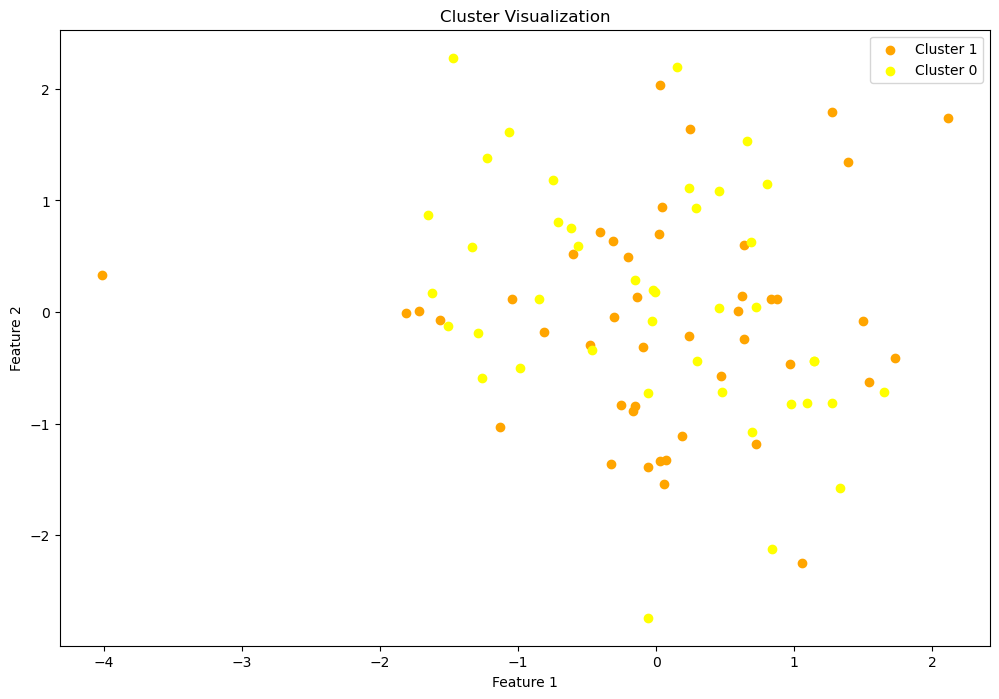

In [49]:
# Plotting the clusters
plt.figure(figsize=(12, 8))
colors = ['yellow', 'orange']

for cluster_id in df['cluster'].unique():
    subset = df[df['cluster'] == cluster_id]
    plt.scatter(
        scaled_embeddings[subset.index, 0], 
        scaled_embeddings[subset.index, 1], 
        c=colors[cluster_id % len(colors)], 
        label=f'Cluster {cluster_id}'
    )
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

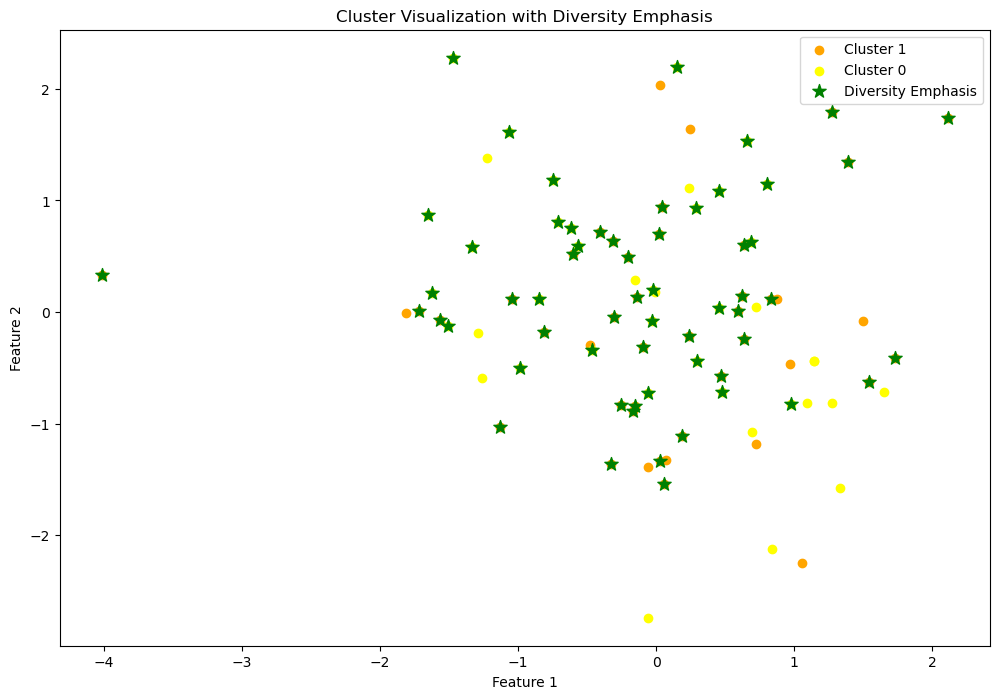

In [50]:
# Plotting the clusters with diversity emphasis
plt.figure(figsize=(12, 8))
colors = ['yellow', 'orange']

for cluster_id in df['cluster'].unique():
    subset = df[df['cluster'] == cluster_id]
    plt.scatter(
        scaled_embeddings[subset.index, 0], 
        scaled_embeddings[subset.index, 1], 
        c=colors[cluster_id % len(colors)], 
        label=f'Cluster {cluster_id}'
    )

# the job descriptions with diversity emphasis
for i, row in df.iterrows():
    if row['diversity_emphasis']:
        plt.scatter(
            scaled_embeddings[i, 0], 
            scaled_embeddings[i, 1], 
            marker='*',
            color= 'green',
            edgecolor='green', 
            s=100,
            label='Diversity Emphasis' if i == 0 else ""
        )

plt.title('Cluster Visualization with Diversity Emphasis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Overall Findings:
Salary and Rating: Both clusters show comparable average salaries and ratings, with Cluster 1 slightly outperforming Cluster 0 in terms of average rating.

Diversity Emphasis: Cluster 1 places a higher emphasis on diversity compared to Cluster 0.

# Thank you!